In [ ]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the data
data = pd.read_csv('data.csv')

# Display the first 5 rows of the data
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


## EDA

In [ ]:
# check the shape of the data
data.shape

(128061, 9)

In [ ]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128061 entries, 0 to 128060
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Age                 128061 non-null  float64
 1   Gender              128061 non-null  object 
 2   Education           128061 non-null  int64  
 3   Introversion Score  128061 non-null  float64
 4   Sensing Score       128061 non-null  float64
 5   Thinking Score      128061 non-null  float64
 6   Judging Score       128061 non-null  float64
 7   Interest            128061 non-null  object 
 8   Personality         128061 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 8.8+ MB


In [ ]:
# data description
data.describe()

,Age,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.411156,4.996387,5.081893,4.988040,4.578293
std,4.908022,0.492045,2.888636,1.183236,2.886018,1.391582
min,18.000000,0.000000,0.000040,0.000000,0.000050,0.000000
25%,23.000000,0.000000,2.490710,4.315659,2.488630,3.709353
50%,25.000000,0.000000,4.993640,5.124169,4.984180,4.690653
75%,29.000000,1.000000,7.500170,5.892288,7.492550,5.561229
max,57.000000,1.000000,9.999990,9.788815,9.999970,9.840494


In [ ]:
# check for missing values
data.isnull().sum()

Age                   0
Gender                0
Education             0
Introversion Score    0
Sensing Score         0
Thinking Score        0
Judging Score         0
Interest              0
Personality           0
dtype: int64

In [ ]:
# check for duplicates
data.duplicated().sum()

0

In [ ]:
# check for unique values in the data
data.nunique()

Age                       39
Gender                     2
Education                  2
Introversion Score    120205
Sensing Score         128054
Thinking Score        120122
Judging Score         127724
Interest                   5
Personality               16
dtype: int64

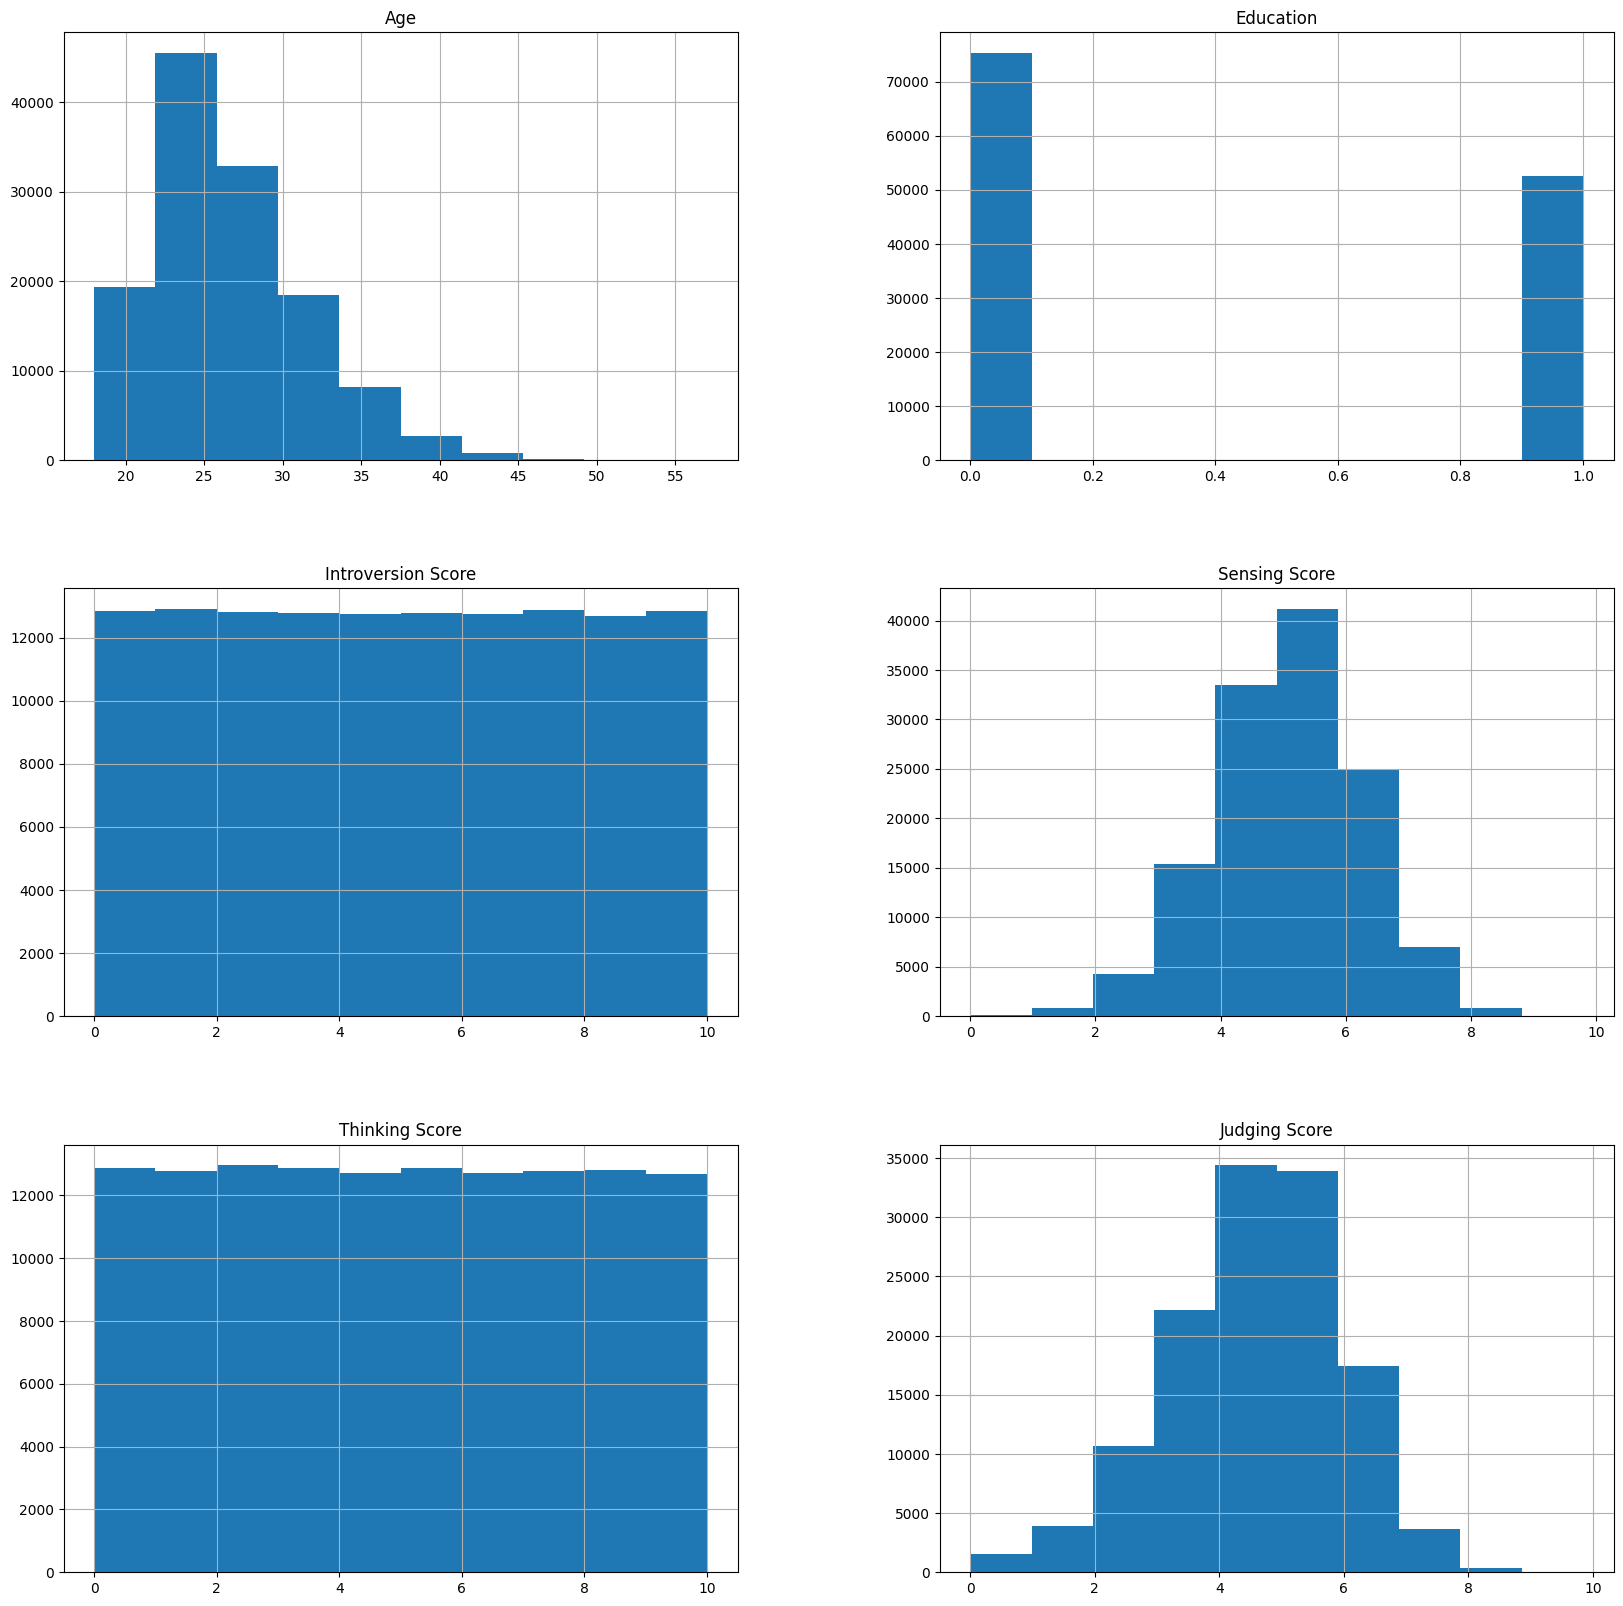

In [ ]:
# check for the distribution of the data
data.hist(figsize=(20, 20))
plt.show()

## Data Preparation

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [ ]:
# convert column Age to integer
data['Age'] = data['Age'].astype(int)

In [ ]:
categorical_columns = data.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Gender', 'Interest', 'Personality'], dtype='object')


In [ ]:
# Create a dictionary to store the label encodings for each column
label_mappings = {}

# Encode the categorical columns to numerical values using Label Encoding
for column in categorical_columns:
    label_encoder = LabelEncoder()  # Create a new instance for each column
    data[column] = label_encoder.fit_transform(data[column])

    # Store the mapping of what was changed to what
    label_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the label mappings for all columns
print("Label Mappings for all columns:")
for column, mapping in label_mappings.items():
    print(f"{column}: {mapping}")

Label Mappings for all columns:
Gender: {'Female': 0, 'Male': 1}
Interest: {'Arts': 0, 'Others': 1, 'Sports': 2, 'Technology': 3, 'Unknown': 4}
Personality: {'ENFJ': 0, 'ENFP': 1, 'ENTJ': 2, 'ENTP': 3, 'ESFJ': 4, 'ESFP': 5, 'ESTJ': 6, 'ESTP': 7, 'INFJ': 8, 'INFP': 9, 'INTJ': 10, 'INTP': 11, 'ISFJ': 12, 'ISFP': 13, 'ISTJ': 14, 'ISTP': 15}


In [ ]:
# Convert all values to standard Python types (int, float, etc.)
def convert_to_serializable(obj):
    if isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, dict):
        return {k: convert_to_serializable(v) for k, v in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(v) for v in obj]
    else:
        return obj

# Apply conversion
label_mappings_serializable = convert_to_serializable(label_mappings)

# Save the label mappings
import json
with open('label_mappings.json', 'w') as file:
    json.dump(label_mappings_serializable, file)


In [ ]:
data.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19,1,0,9.47080,7.141434,6.03696,4.360278,4,1
1,27,0,0,5.85392,6.160195,0.80552,4.221421,2,5
2,21,0,0,7.08615,3.388433,2.66188,5.127320,4,1
3,28,1,0,2.01892,4.823624,7.30625,5.986550,1,11
4,36,0,1,9.91703,4.755080,5.31469,4.677213,3,1


In [ ]:
data.describe()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
count,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000,128061.000000
mean,26.349091,0.549988,0.411156,4.996387,5.081893,4.988040,4.578293,2.344070,5.532449
std,4.908022,0.497497,0.492045,2.888636,1.183236,2.886018,1.391582,1.588091,4.270469
min,18.000000,0.000000,0.000000,0.000040,0.000000,0.000050,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,2.490710,4.315659,2.488630,3.709353,1.000000,1.000000
50%,25.000000,1.000000,0.000000,4.993640,5.124169,4.984180,4.690653,3.000000,3.000000
75%,29.000000,1.000000,1.000000,7.500170,5.892288,7.492550,5.561229,4.000000,9.000000
max,57.000000,1.000000,1.000000,9.999990,9.788815,9.999970,9.840494,4.000000,15.000000


In [ ]:
# Split the data into features and target
X = data.drop('Personality', axis=1)
y = data['Personality']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Model Building  

In [ ]:
## Model Building (Decision Tree Classifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import optuna
from sklearn.model_selection import RandomizedSearchCV
import joblib

## Decision Tree

In [ ]:
# parameter optimization
def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy'])
    splitter = trial.suggest_categorical('splitter', ['best', 'random'])
    max_depth = trial.suggest_int('max_depth', 1, 32)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)

    model = DecisionTreeClassifier(
        criterion=criterion,
        splitter=splitter,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

trial = study.best_trial
print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


[I 2024-09-26 21:34:42,825] A new study created in memory with name: no-name-ccbdea3a-9825-4016-bc01-2cc184e08258
[I 2024-09-26 21:34:43,082] Trial 0 finished with value: 0.8573771131847109 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 25, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8573771131847109.
[I 2024-09-26 21:34:43,475] Trial 1 finished with value: 0.8476164447741381 and parameters: {'criterion': 'entropy', 'splitter': 'random', 'max_depth': 24, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8573771131847109.
[I 2024-09-26 21:34:44,805] Trial 2 finished with value: 0.8602272283605982 and parameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 12}. Best is trial 2 with value: 0.8602272283605982.
[I 2024-09-26 21:34:44,991] Trial 3 finished with value: 0.7723031273181588 and parameters: {'criterion': 'entropy', 'splitter': '

Accuracy: 0.8996993714129543
Best hyperparameters: {'criterion': 'entropy', 'splitter': 'best', 'max_depth': 10, 'min_samples_split': 19, 'min_samples_leaf': 20}


In [ ]:
# Model Building
model = DecisionTreeClassifier(**trial.params)
model.fit(X_train, y_train)

# Training Accuracy
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Train Accuracy: {train_accuracy}")

y_pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy}")


# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Train Accuracy: 0.9048297672965797
Test Accuracy: 0.8996993714129543
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.87      0.90       799
           1       0.93      0.93      0.93      6963
           2       0.90      0.89      0.90       531
           3       0.92      0.92      0.92      4989
           4       0.73      0.73      0.73       101
           5       0.82      0.84      0.83       981
           6       0.79      0.71      0.74        78
           7       0.82      0.82      0.82       633
           8       0.87      0.90      0.89       611
           9       0.90      0.91      0.90      4895
          10       0.92      0.83      0.87       362
          11       0.89      0.90      0.90      3415
          12       0.78      0.57      0.66        75
          13       0.79      0.77      0.78       670
          14       0.90      0.73      0.80        48
          15       0.82      0.79      0.80

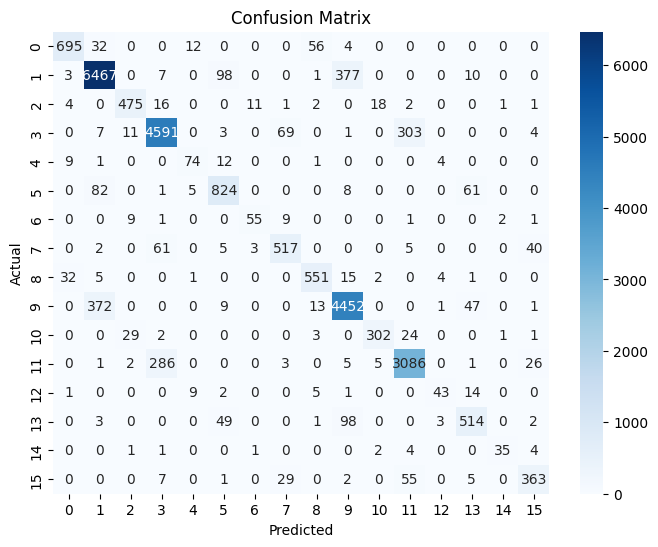

In [ ]:
# confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# save the model
joblib.dump(model, 'personality_classifier_dt.pkl')

['personality_classifier_dt.pkl']

## Random Forest  

In [ ]:

from sklearn.ensemble import RandomForestClassifier


In [ ]:

# Define the objective function
def objective(trial):
    # Hyperparameter space
    n_estimators = trial.suggest_categorical('n_estimators', [50, 100, 200, 400, 800, 1000])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    max_depth = trial.suggest_int('max_depth', 10, 100)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])

    # Create the model
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_features=max_features,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        random_state=42
    )

    # K-Fold Cross Validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = []

    for train_index, test_index in kfold.split(X_train):
        X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        # Fit the model
        rf_classifier.fit(X_train_fold, y_train_fold)

        # Predict and evaluate
        y_pred_fold = rf_classifier.predict(X_test_fold)
        score = accuracy_score(y_test_fold, y_pred_fold)
        scores.append(score)

    # Return the mean accuracy as the objective value
    return sum(scores) / len(scores)

# # Create a study and optimize
# study = optuna.create_study(direction='maximize')  # maximize accuracy
# study.optimize(objective, n_trials=100)

# # Get the best hyperparameters
# best_params = study.best_params
# print(f"Best Parameters: {best_params}")


c:\VSC\advance_ML\venv_ml\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
{'n_estimators': 50, 'max_features': 'log2', 'max_depth': 17, 'min_samples_split': 2, 'min_samples_leaf': 2, 'bootstrap': True}

# Create the model with the best hyperparameters
rf_classifier = RandomForestClassifier(
    n_estimators=50,
    max_features='log2',
    max_depth=17,
    min_samples_split=2,
    min_samples_leaf=2,
    bootstrap=True,
    random_state=42
)

# Fit the model
rf_classifier.fit(X_train, y_train)

# Predict the target
y_pred = rf_classifier.predict(X_test)

# Evaluate the model - get training and testing accuracy | get classification report | get confusion matrix
training_accuracy = rf_classifier.score(X_train, y_train)
testing_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")


Training Accuracy: 0.972590972981415
Testing Accuracy: 0.9045797056182407


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       799
           1       0.93      0.94      0.93      6963
           2       0.92      0.90      0.91       531
           3       0.92      0.92      0.92      4989
           4       0.80      0.74      0.77       101
           5       0.84      0.85      0.84       981
           6       0.88      0.76      0.81        78
           7       0.83      0.83      0.83       633
           8       0.91      0.91      0.91       611
           9       0.90      0.91      0.91      4895
          10       0.93      0.85      0.89       362
          11       0.89      0.90      0.90      3415
          12       0.81      0.57      0.67        75
          13       0.81      0.79      0.80       670
          14       0.78      0.81      0.80        48
          15       0.82      0.79      0.80       462

    accuracy                           0.90     25613
   

In [ ]:
y_test.shape, y_pred.shape

((25613,), (25613,))

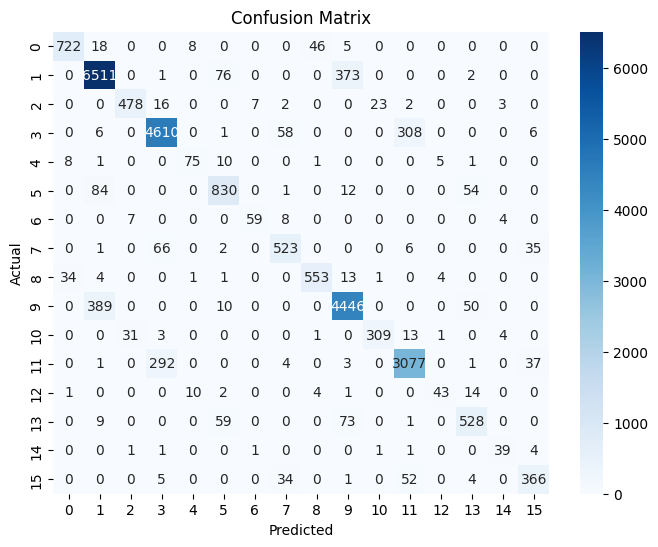

In [ ]:
# confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


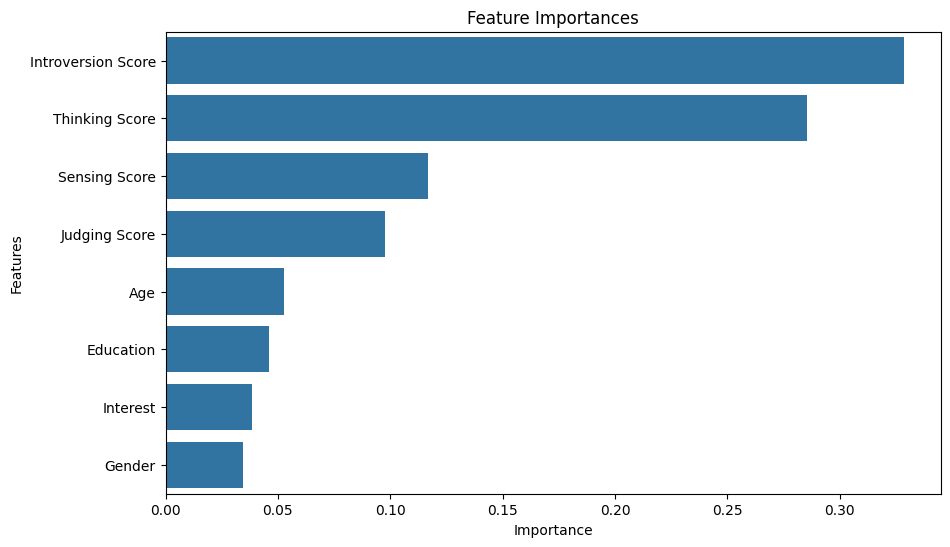

In [ ]:

# Feature Importance
feature_importances = rf_classifier.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_df)
plt.title("Feature Importances")
plt.show()


In [ ]:
# Save the model
joblib.dump(rf_classifier, 'personality_classifier_rf.pkl')


['personality_classifier_rf.pkl']

In [ ]:

# Load the model
model = joblib.load('personality_classifier.pkl')

# Load the label mappings
with open('label_mappings.json', 'r') as file:
    label_mappings = json.load(file)

## Gradient Boosting

In [ ]:
# xgboost model
from xgboost import XGBClassifier

# Create the model
xgb_model = XGBClassifier(subsample=0.8, reg_lambda=1, reg_alpha=0, n_estimators=300, max_depth=3, learning_rate=0.1, colsample_bytree=0.8, random_state=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predict the target
y_pred = xgb_model.predict(X_test)

# Evaluate the model - get training and testing accuracy | get classification report | get confusion matrix
training_accuracy = xgb_model.score(X_train, y_train)
testing_accuracy = accuracy_score(y_test, y_pred)

print(f"Training Accuracy: {training_accuracy}")
print(f"Testing Accuracy: {testing_accuracy}")



Training Accuracy: 0.9131071372794003
Testing Accuracy: 0.9085230156561122


In [ ]:
# classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       799
           1       0.93      0.93      0.93      6963
           2       0.92      0.94      0.93       531
           3       0.93      0.92      0.93      4989
           4       0.82      0.81      0.82       101
           5       0.84      0.85      0.84       981
           6       0.90      0.81      0.85        78
           7       0.83      0.84      0.84       633
           8       0.91      0.93      0.92       611
           9       0.91      0.91      0.91      4895
          10       0.91      0.88      0.90       362
          11       0.90      0.91      0.90      3415
          12       0.80      0.75      0.77        75
          13       0.82      0.78      0.80       670
          14       0.76      0.79      0.78        48
          15       0.83      0.80      0.82       462

    accuracy                           0.91     25613
   

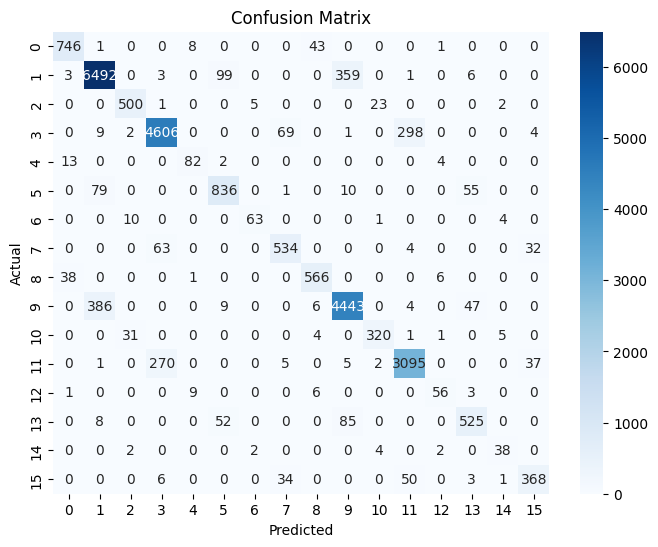

In [ ]:
# confusion matrix plot
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


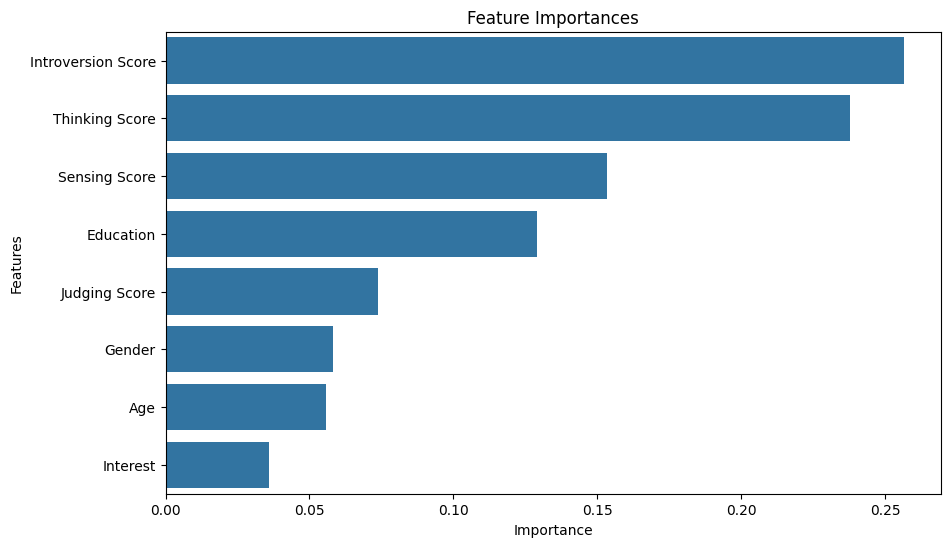

In [ ]:
# plot feature importance
feature_importances = xgb_model.feature_importances_
features = X.columns
feature_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Features', data=feature_df)
plt.title("Feature Importances")
plt.show()



In [ ]:
# Save the model
joblib.dump(xgb_model, 'personality_classifier_xgb.pkl')


['personality_classifier_xgb.pkl']

In [ ]:
label_mappings

{'Gender': {'Female': 0, 'Male': 1},
 'Interest': {'Arts': 0,
  'Others': 1,
  'Sports': 2,
  'Technology': 3,
  'Unknown': 4},
 'Personality': {'ENFJ': 0,
  'ENFP': 1,
  'ENTJ': 2,
  'ENTP': 3,
  'ESFJ': 4,
  'ESFP': 5,
  'ESTJ': 6,
  'ESTP': 7,
  'INFJ': 8,
  'INFP': 9,
  'INTJ': 10,
  'INTP': 11,
  'ISFJ': 12,
  'ISFP': 13,
  'ISTJ': 14,
  'ISTP': 15}}

In [ ]:
# Load the model
model = joblib.load('personality_classifier_xgb.pkl')

# Load the label mappings
with open('label_mappings.json', 'r') as file:
    label_mappings = json.load(file)

# Example input data for prediction (replace these with actual values or data from a dataset)
age = 21
gender = 0  # Assuming 1 is male and 0 is female (as per label mappings)
education = 0  # Adjust according to education level expected by the model
introversion_score = 4  # Example score
sensing_score = 8  # Example score
thinking_score = 7  # Example score
judging_score = 8  # Example score
interest = 1 # Assuming 2 represents "Sports" (as per label mappings)

# Prepare the input for the model (assuming the model expects the input as a list or array of values)
input_data = [[age, gender, education, introversion_score, sensing_score, thinking_score, judging_score, interest]]

# Make the prediction
prediction = model.predict(input_data)

# Convert the predicted label to its human-readable form using the "Personality" key in the label mappings
predicted_personality = None
for personality, label in label_mappings["Personality"].items():
    if label == prediction[0]:
        predicted_personality = personality
        break

if predicted_personality:
    print(f"Predicted Personality: {predicted_personality}")
else:
    print("Error: Predicted label not found in the mappings.")


Predicted Personality: ENTJ
